In [ ]:
import pandas as pd

In [7]:
df = pd.read_csv('cancer.csv')
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [18]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

y = df.Diagnosis
X = df.drop('Diagnosis', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = KNeighborsClassifier(n_neighbors = 10)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

Test Accuracy 0.65
Train Accuracy 0.7475
[[163  21]
 [ 84  32]]


Test Accuracy 0.93
Train Accuracy 0.9583333333333334
[[177   7]
 [ 14 102]]


<Axes: >

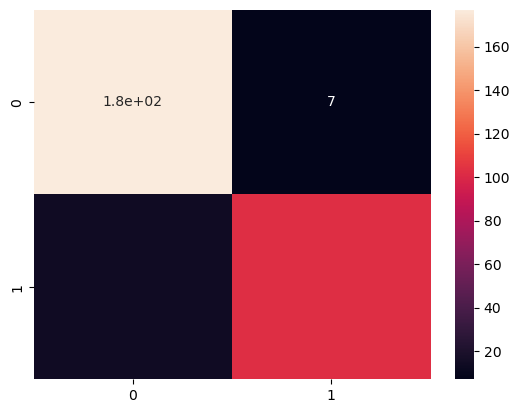

In [24]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

y = df.Diagnosis
X = df.drop('Diagnosis', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model1 = RandomForestClassifier(n_estimators=100,
                               criterion = 'gini',
                               max_depth = 15,
                               max_features = 'sqrt',
                               class_weight = 'balanced',
                               min_samples_leaf = 5,
                               min_samples_split = 10,
                               random_state=42)

model1.fit(X_train, y_train)

y_pred_test1 = model.predict(X_test)
y_pred_train = model.predict(X_train)

from sklearn.metrics import accuracy_score

print("Test Accuracy", accuracy_score(y_test, y_pred_test1))
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_test, y_pred_test1)
import matplotlib.pyplot as plt
import seaborn as sns
print(cm)
sns.heatmap(cm, annot=True)
